<a href="https://colab.research.google.com/github/Thipwadee/Project2/blob/main/TA_Clf_Models_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.inspection import PartialDependenceDisplay


In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [29]:
df_encoded = pd.read_excel('/content/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [30]:
df_encoded.rename(columns = {'เพศ_หญิง':'เพศหญิง','เพศ_ชาย' : 'เพศชาย', 'seasons_summer' : 'summer', 'seasons_winter' : 'winter', 'พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้' : 'ใต้ร่มไม้', 'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง' : 'กลางแจ้ง',
                       'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม' : 'มีหลังคาคลุม', 'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร' : 'ภายใต้อาคาร', 'อุณหภูมิ' : 'ความรู้สึกถึงอุณหภูมิ', 'ความชื้น' : 'ความรู้สึกถึงความชื้น',
                       'กระแสลม' : 'ความรู้สึกถึงกระแสลม','ความแรงของแสงแดด' : 'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง' : 'ความรู้สึกถึงเหงื่อ', 'ความร้อน' : 'ความต้องการอุณหภูมิ','ความชื้น.1' : 'ความต้องการความชื้น', 'กระแสลม.1': 'ความต้องการกระแสลม', 'แสงแดด' : 'ความต้องการแสงแดด',
                       'เหงื่อบริเวณผิวหนัง.1': 'ความต้องการเหงื่อ'}, inplace = True)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [31]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    object 
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

In [32]:
df = {'Accept':0, 'Unaccept':1}
df_encoded = df_encoded.copy()
for i in range(5,6):
  df_encoded.iloc[:,i] = df_encoded.iloc[:,i].map(df)
df_encoded

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,0,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,0,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,0,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,0,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,0,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,0,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,1,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,0,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,0,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [33]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    int64  
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

In [34]:
#df_encoded['ความรู้สึกถึงอุณหภูมิ'] = df_encoded['ความรู้สึกถึงอุณหภูมิ'].astype(int)
#df_encoded['ความรู้สึกถึงความชื้น'] = df_encoded['ความรู้สึกถึงความชื้น'].astype(int)
#df_encoded['ความรู้สึกถึงกระแสลม'] = df_encoded['ความรู้สึกถึงกระแสลม'].astype(int)
#df_encoded['ความรู้สึกถึงแสงแดด'] = df_encoded['ความรู้สึกถึงแสงแดด'].astype(int)
#df_encoded['ความรู้สึกถึงเหงื่อ'] = df_encoded['ความรู้สึกถึงเหงื่อ'].astype(int)
#df_encoded['ความต้องการอุณหภูมิ'] = df_encoded['ความต้องการอุณหภูมิ'].astype(int)
#df_encoded['ความต้องการความชื้น'] = df_encoded['ความต้องการความชื้น'].astype(int)
#df_encoded['ความต้องการกระแสลม'] = df_encoded['ความต้องการกระแสลม'].astype(int)
#df_encoded['ความต้องการแสงแดด'] = df_encoded['ความต้องการแสงแดด'].astype(int)
#df_encoded['ความต้องการเหงื่อ'] = df_encoded['ความต้องการเหงื่อ'].astype(int)
#df_encoded['TMRT'] = df_encoded['TMRT'].astype(int)
#df_encoded['ใต้ร่มไม้'] = df_encoded['ใต้ร่มไม้'].astype(int)
#df_encoded['กลางแจ้ง'] = df_encoded['กลางแจ้ง'].astype(int)
#df_encoded['มีหลังคาคลุม'] = df_encoded['มีหลังคาคลุม'].astype(int)
#df_encoded['ภายใต้อาคาร'] = df_encoded['ภายใต้อาคาร'].astype(int)
#df_encoded['summer'] = df_encoded['summer'].astype(int)
#df_encoded['winter'] = df_encoded['winter'].astype(int)
#df_encoded['เพศชาย'] = df_encoded['เพศชาย'].astype(int)
#df_encoded['เพศหญิง'] = df_encoded['เพศหญิง'].astype(int)

#print(df_encoded.dtypes)

#Spitt Data

In [35]:
fo_mapping = {
    -2 :0,
    -1 :1,
    0 : 2,
    1 : 3,
    2 :4,
    3 :5,
}

df_encoded['TSV7'] = df_encoded['Thermal_sensation_Vote'].map(fo_mapping)

In [36]:
X = df_encoded.drop(['Thermal_acceptance','TSV7','Thermal_sensation_Vote'], axis =1)
y = df_encoded['Thermal_acceptance']
y2 = df_encoded['TSV7']

#Models
##แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote

#TA

In [37]:
 import numpy as np
 from sklearn.model_selection import KFold
 from imblearn.over_sampling import SMOTE
 from sklearn.preprocessing import StandardScaler

# # ตั้งค่าพารามิเตอร์สำหรับ K-Fold
 k = 5
 kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # วนลูปผ่าน K-Fold
 for train_index, test_index in kf.split(X):
# #     # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # ทำมาตรฐานข้อมูล
     scaler = StandardScaler()
     X_train_scaled = scaler.fit_transform(X_train)
     X_test_scaled = scaler.transform(X_test)

     X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)

     # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
     smote = SMOTE(random_state=42)
     X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


     print(f"Training set size after resampling: {X_train_res.shape}")
     print(f"Test set size: {X_test_scaled.shape}")


Training set size after resampling: (270, 26)
Test set size: (39, 26)
Training set size after resampling: (274, 26)
Test set size: (39, 26)
Training set size after resampling: (276, 26)
Test set size: (39, 26)
Training set size after resampling: (276, 26)
Test set size: (38, 26)
Training set size after resampling: (280, 26)
Test set size: (38, 26)


#Logistics Regression

In [ ]:
 param_grid = dict(
     C= [0.001, 0.01, 0.1, 1, 10, 100],
     penalty=['l1','l2'],
     max_iter= [100, 200, 500, 1000],
    solver= ['lbfgs', 'saga']
 )
 lgt_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, refit=True, verbose=0)
 lgt_grid.fit(X_train_res, y_train_res)
 print("best_params :",lgt_grid.best_params_)
 print("accuracy :",lgt_grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

best_params : {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9535714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator

best_params : {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9535714285714286

In [38]:
Log_reg = LogisticRegression(C= 100, max_iter=100, penalty= 'l2', solver= 'lbfgs')

# Train the model
result = Log_reg.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = Log_reg.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[28  4]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.50      0.67      0.57         6

    accuracy                           0.84        38
   macro avg       0.72      0.77      0.74        38
weighted avg       0.86      0.84      0.85        38



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
X does not have valid feature names, but LogisticRegression was fitted with feature names


In [13]:
!pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 8.0 MB/s eta 0:00:00


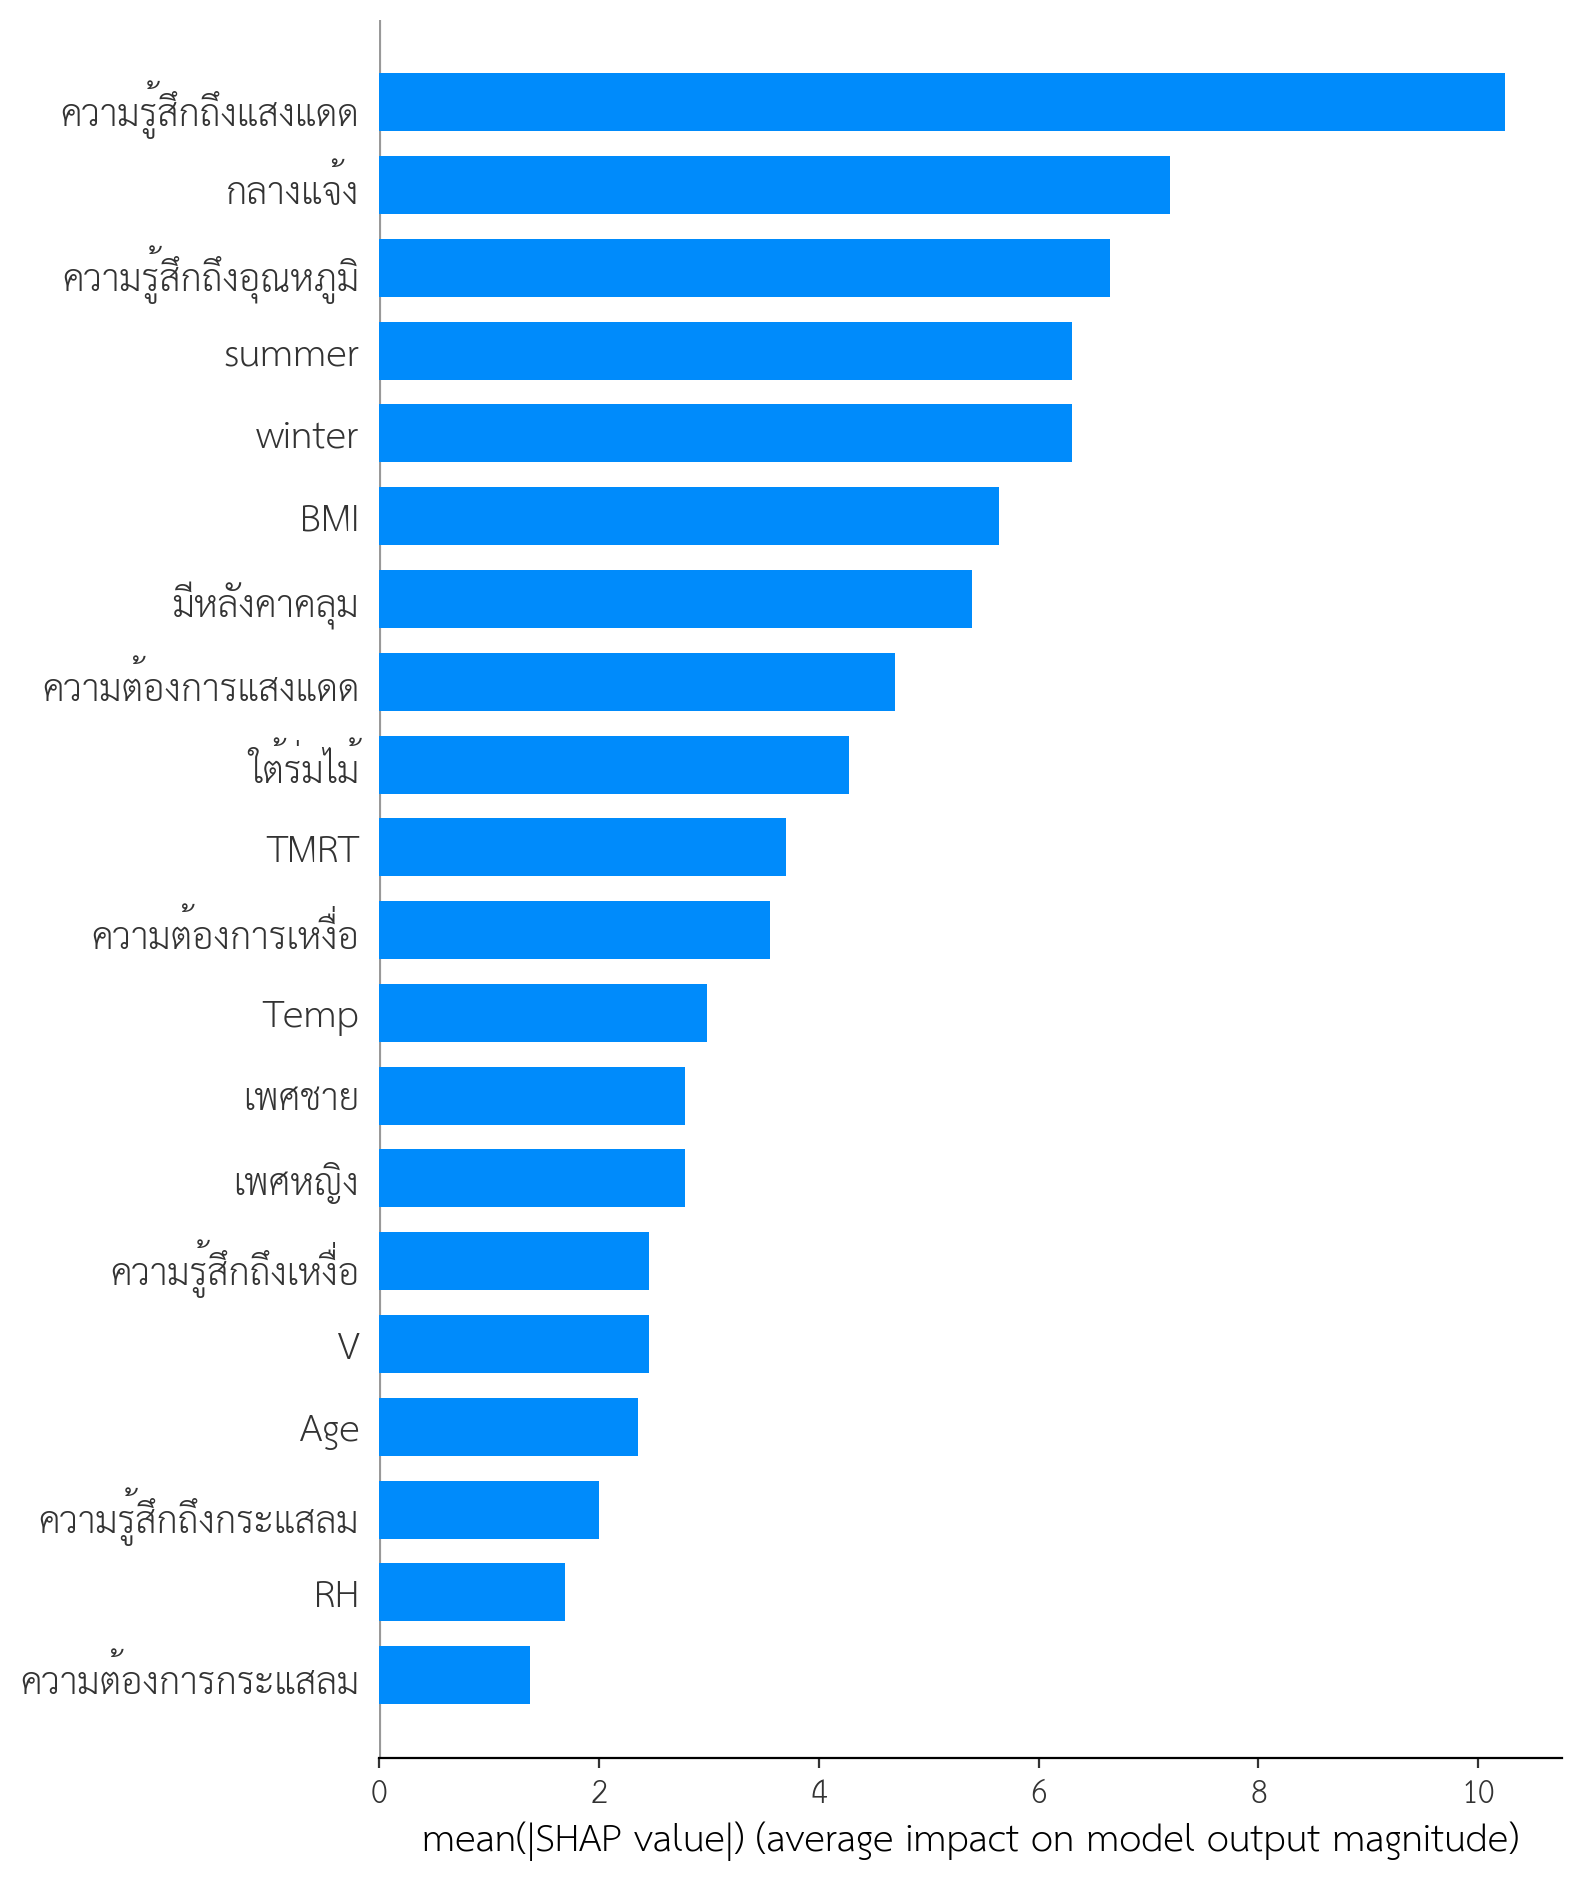

In [39]:
masker = shap.maskers.Independent(data = X_train_res)
# SHAP Interpreter
shapExplainer = shap.LinearExplainer(Log_reg,masker=masker)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')

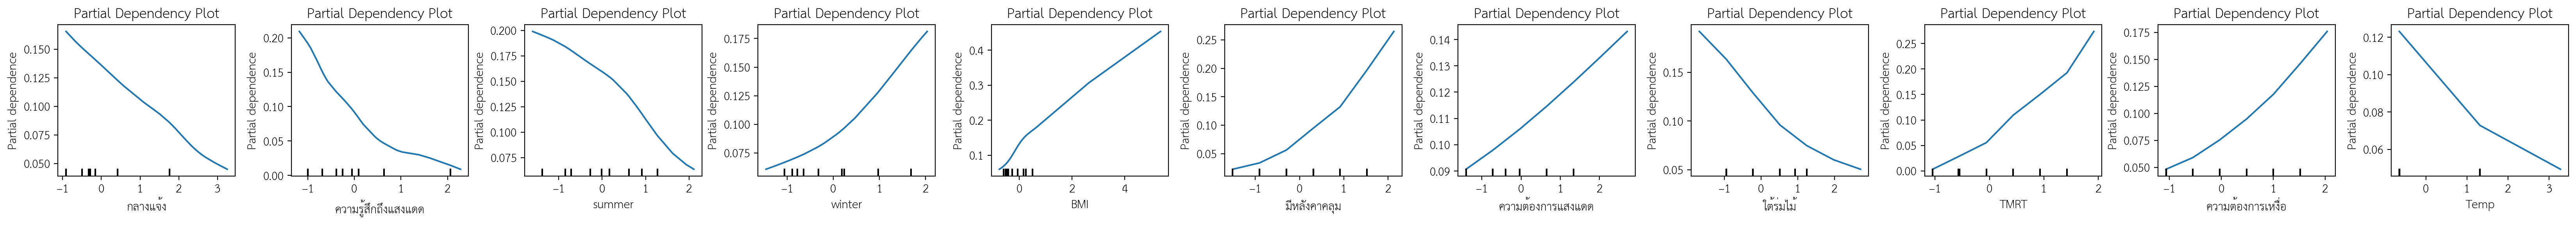

In [15]:
base_features = ['กลางแจ้ง','ความรู้สึกถึงแสงแดด','summer','winter','BMI','มีหลังคาคลุม','ความต้องการแสงแดด','ใต้ร่มไม้','TMRT','ความต้องการเหงื่อ', 'Temp']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_scaled,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

#coef

In [ ]:
coeff=Log_reg.coef_[0].round(4)
coeff

array([ -1.6779, -13.995 ,  -3.1904,   1.3983,   0.8166,   6.6843,
         5.3626,   0.6473,  -4.9847,  10.8703,  -0.9013,   1.235 ,
         0.6478,  -1.0961,  -8.7593,   5.9707,   3.6257,  -0.    ,
         0.    ,   4.2203,   6.6084,  -4.9443,  -1.2794,  -6.1475,
         6.1475,  -2.9659,   2.9659])

In [ ]:
Log_reg.intercept_

array([-34.82875232])

In [ ]:
#Intercept and Coefficient
#print("Intercept: ", Log_reg.intercept_)
#print("Coefficients:")
#list(zip(X.columns, coeff))

In [ ]:
log_summary=pd.DataFrame({"features":X.columns, "Coefficients":coeff})
log_summary.sort_values(["Coefficients"], ascending= False)
log_summary

,features,Coefficients
0,Age,-1.6779
1,BMI,-13.9950
2,Temp,-3.1904
3,RH,1.3983
4,V,0.8166
5,Thermal_sensation_Vote,6.6843
6,ความรู้สึกถึงอุณหภูมิ,5.3626
7,ความรู้สึกถึงความชื้น,0.6473
8,ความรู้สึกถึงกระแสลม,-4.9847
9,ความรู้สึกถึงแสงแดด,10.8703


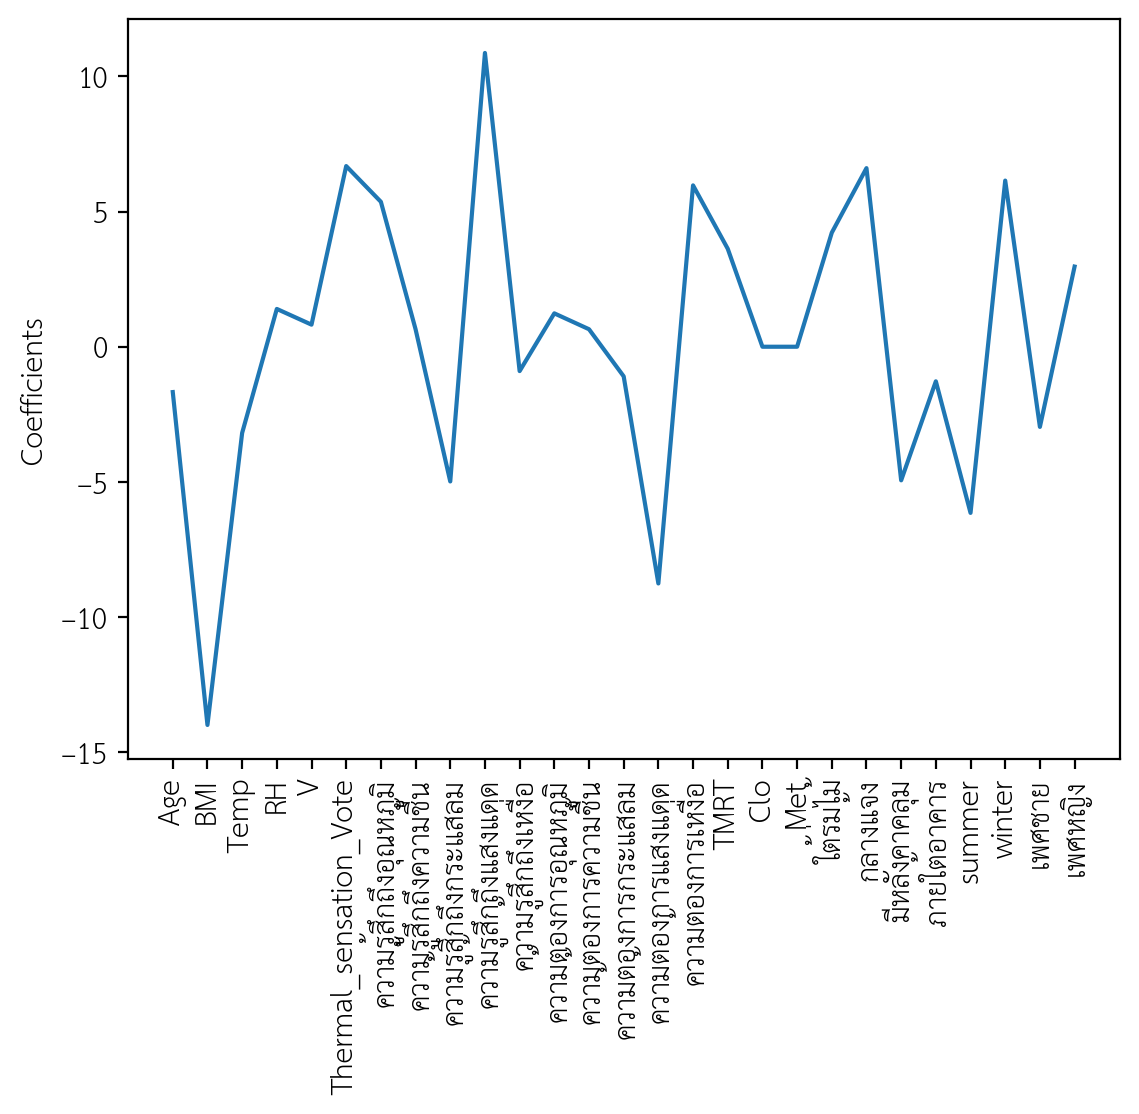

In [ ]:
_=plt.plot(range(len(X.columns)),coeff)
_=plt.xticks(range(len(X.columns)),X.columns,rotation=90)
_=plt.ylabel("Coefficients")
plt.show()

OR

In [ ]:
import statsmodels.formula.api as smf
import patsy
patsy.__version__

'0.5.6'

In [ ]:
ndf=pd.concat([X_train_res, y_train_res], axis=1)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    int64  
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

In [ ]:
formula = 'Thermal_acceptance ~ Age+ BMI+ Temp+ RH+ V+ TMRT'

In [ ]:
#formula3 = 'Thermal_acceptance ~ Age+ BMI+ Temp+ RH+ V+ อุณหภูมิ+ ความชื้น+ กระแสลม +ความแรงของแสงแดด+ความชื้น.1 + กระแสลม.1 + แสงแดด+ TMRT + พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้+ พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง + พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม + พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร + seasons_summer + seasons_winter + เพศ_ชาย+ เพศ_หญิง'

In [ ]:
#formula2 = 'Thermal_acceptance ~ C(Age)+ C(BMI)+ C(Temp)+ C(RH)+ C(V)+ C(อุณหภูมิ)+ C(ความชื้น)+ C(กระแสลม) +C(ความแรงของแสงแดด)+C(ความชื้น.1)+C(กระแสลม.1)+C(แสงแดด)+C(TMRT)+C(Clo)+C(Met)+C(พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้)+C(พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง)+C(พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม) +C(พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร)+C(seasons_summer)+C(seasons_winter)+C(เพศ_ชาย)+C(เพศ_หญิง)'

In [ ]:
model=smf.logit(formula=formula, data=ndf).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.367377
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Thermal_acceptance   No. Observations:                  280
Model:                          Logit   Df Residuals:                      273
Method:                           MLE   Df Model:                            6
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.4700
Time:                        07:59:35   Log-Likelihood:                -102.87
converged:                       True   LL-Null:                       -194.08
Covariance Type:            nonrobust   LLR p-value:                 1.033e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8993      0.319     -5.960      0.000      -2.524      -1.275
Age           -0.0563      0.

In [ ]:
model_odds = pd.DataFrame(np.exp(model.params),columns=['OR'])
model_odds['p-value']=model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
print(model_odds)

                 OR       p-value      2.5%     97.5%
Intercept  0.149673  2.520265e-09  0.080148  0.279508
Age        0.945294  7.905147e-01  0.624155  1.431663
BMI        0.347203  1.672109e-03  0.179513  0.671539
Temp       2.999864  1.008572e-02  1.299139  6.927037
RH         1.042874  8.706798e-01  0.629114  1.728759
V          1.607266  1.223441e-01  0.880338  2.934445
TMRT       4.231902  2.645046e-04  1.949382  9.187008


#Random forest


In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7],'criterion':['gini', 'entropy', 'log_loss']}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
rf_grid.fit(X_train_res, y_train_res)
print("best_params :",rf_grid.best_params_)
print("accuracy :",rf_grid.best_score_)

best_params : {'criterion': 'gini', 'max_depth': 6, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 50}
accuracy : 0.9357142857142857


In [47]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 6, max_features= 2, min_samples_split= 3, n_estimators= 50)

result = rf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[32  0]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.67      0.80         6

    accuracy                           0.95        38
   macro avg       0.97      0.83      0.88        38
weighted avg       0.95      0.95      0.94        38



X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [48]:
#from sklearn import tree
#
#for i in range(len(rf.estimators_)):
#        plt.figure(figsize = (15,10))
#        tree.plot_tree(rf.estimators_[1] , filled =True)
#        plt.show()

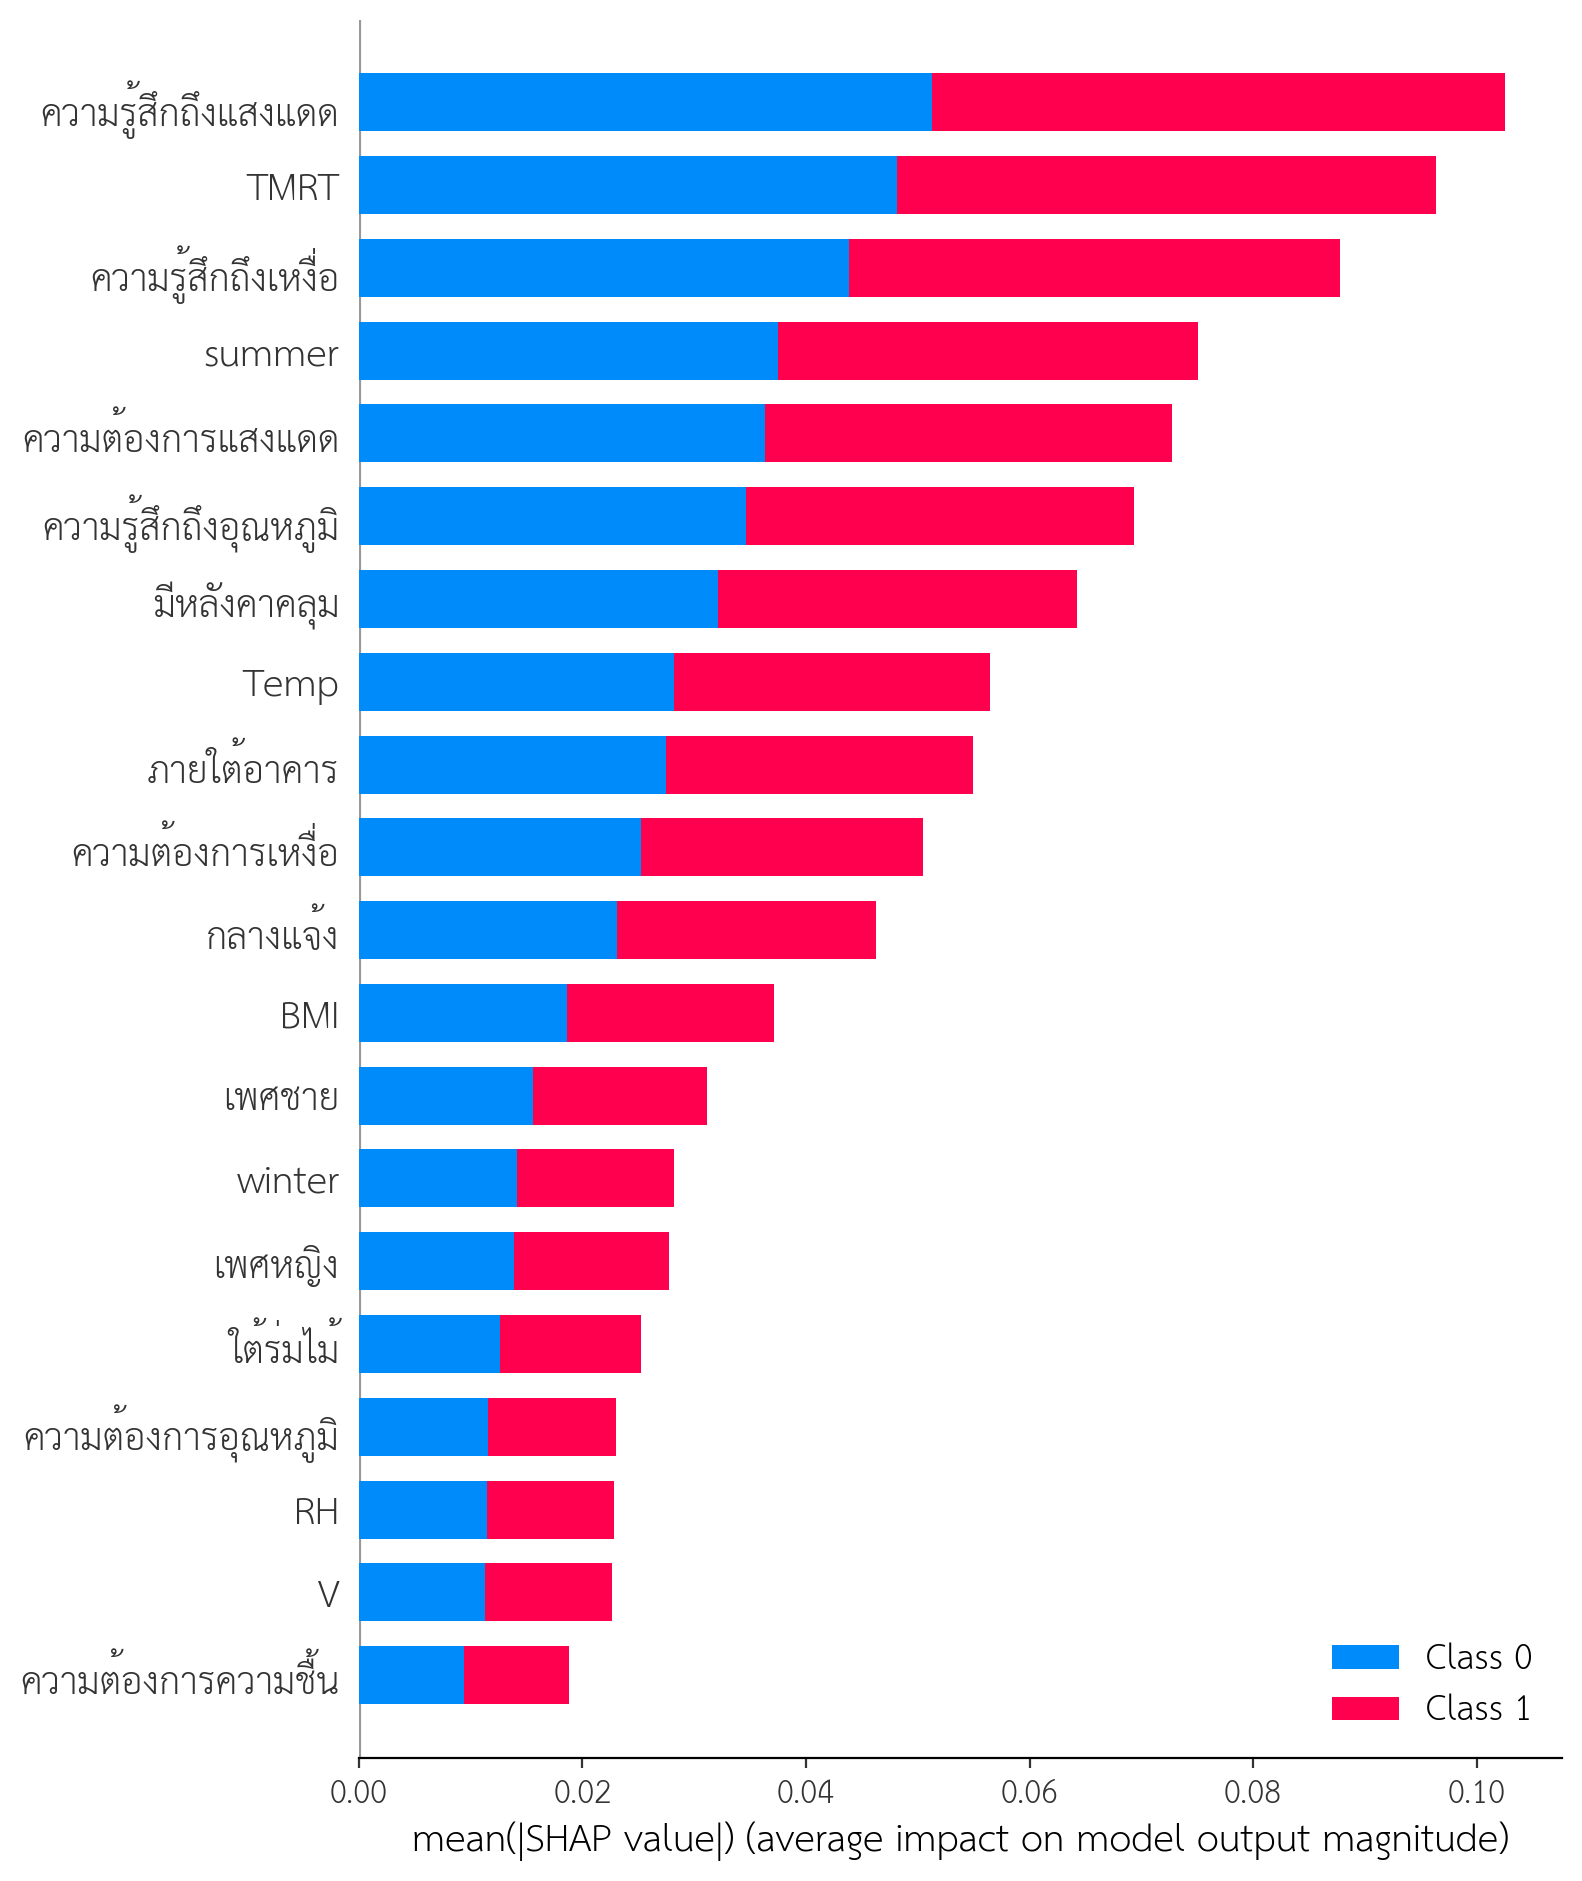

In [49]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(rf)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')

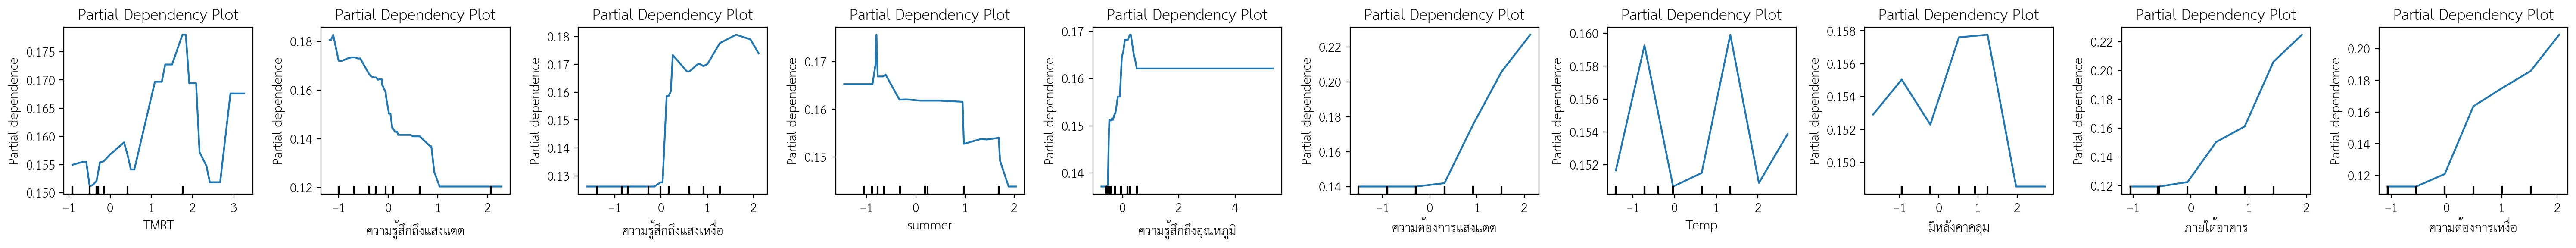

In [50]:
base_features = ['TMRT','ความรู้สึกถึงแสงแดด','ความรู้สึกถึงแสงเหงื่อ','summer','ความรู้สึกถึงอุณหภูมิ','ความต้องการแสงแดด','Temp','มีหลังคาคลุม','ภายใต้อาคาร','ความต้องการเหงื่อ']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_scaled,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

#XGBoost

In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3],
              'n_estimators':[5,10,20,100],'subsample': [0.3, 0.5, 1]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train_res, y_train_res)
print("best_params :",xgb_grid.best_params_)
print("accuracy :",xgb_grid.best_score_)

best_params : {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
accuracy : 0.9142857142857144


In [43]:
xgb = XGBClassifier(learning_rate= 0.05, max_depth= 5, min_child_weight= 1, n_estimators= 100,subsample=1)

result = xgb.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[29  3]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.57      0.67      0.62         6

    accuracy                           0.87        38
   macro avg       0.75      0.79      0.77        38
weighted avg       0.88      0.87      0.87        38



In [44]:
#!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
#import matplotlib as mpl
#mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
#mpl.rc('font', family='TH Sarabun New')

In [45]:
#from xgboost import plot_tree

#plot_tree(xgb)
#plt.show()

[15:20:44] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


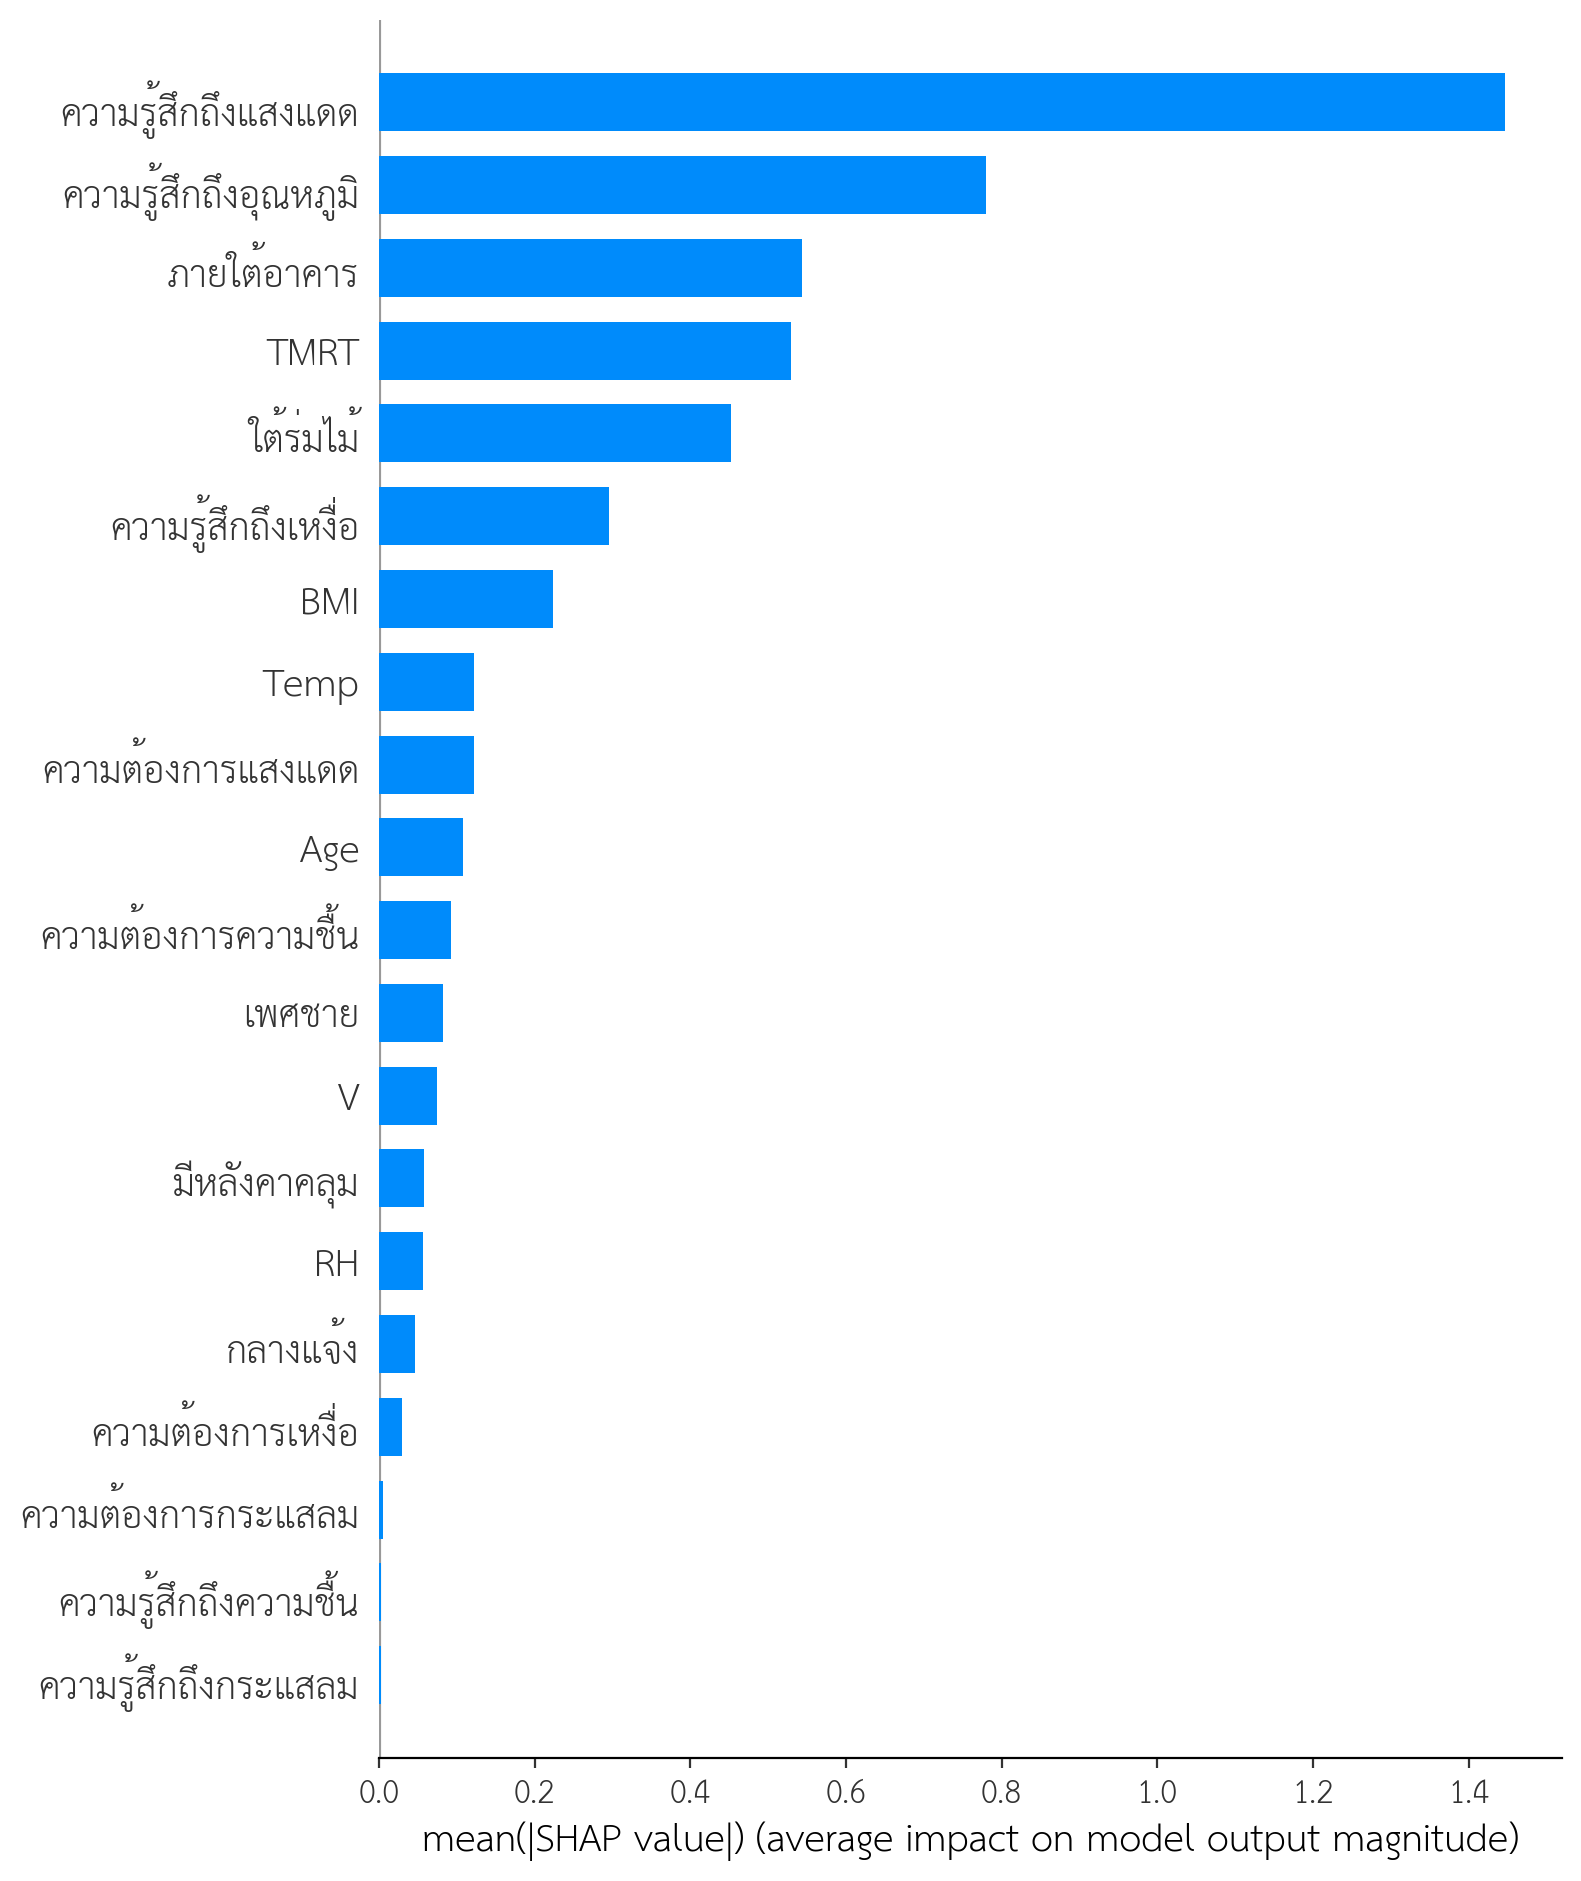

In [46]:
# SHAP Interpreter
shapExplainer = shap.TreeExplainer(xgb)
shapValues = shapExplainer.shap_values(X_train_res)

# Explainer details
shapExplainer.__dict__

# Summary features contribute in model
shap.summary_plot(shapValues, X_train_res, plot_type = 'bar')

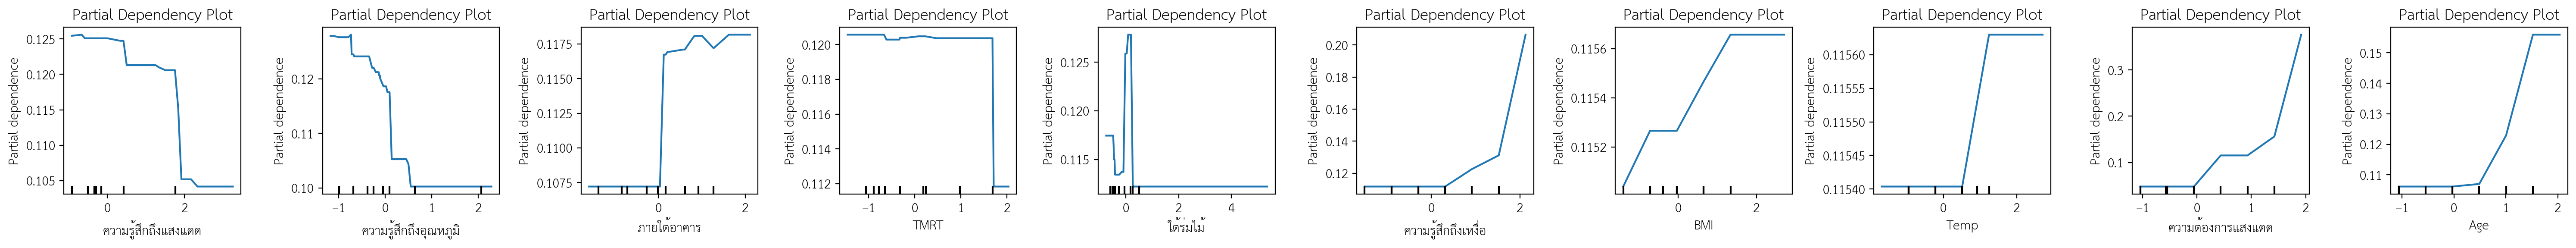

In [24]:
base_features = ['ความรู้สึกถึงแสงแดด','ความรู้สึกถึงอุณหภูมิ','ภายใต้อาคาร','TMRT','ใต้ร่มไม้','ความรู้สึกถึงเหงื่อ','BMI','Temp','ความต้องการแสงแดด','Age']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_scaled,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

#SVC

In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)

best_params : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.9821428571428571


In [25]:
svm = SVC(C= 100,gamma= 0.1, kernel='rbf')

result = svm.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = svm.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[30  2]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.71      0.83      0.77         6

    accuracy                           0.92        38
   macro avg       0.84      0.89      0.86        38
weighted avg       0.93      0.92      0.92        38



X does not have valid feature names, but SVC was fitted with feature names


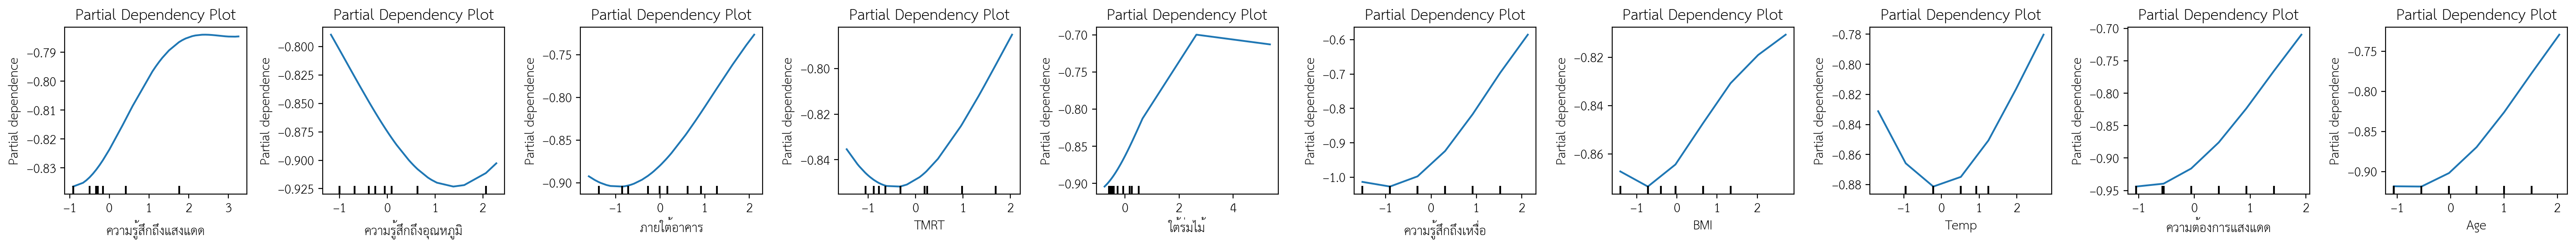

In [27]:
base_features = ['ความรู้สึกถึงแสงแดด','ความรู้สึกถึงอุณหภูมิ','ภายใต้อาคาร','TMRT','ใต้ร่มไม้','ความรู้สึกถึงเหงื่อ','BMI','Temp','ความต้องการแสงแดด','Age']
n_cols = len(base_features)  # จำนวนคอลัมน์ตามจำนวน features
fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(n_cols * 3, 3))  # ปรับขนาดให้เหมาะสม

for i, bf in enumerate(base_features):
    PartialDependenceDisplay.from_estimator(
        result,
        X_train_scaled,
        features=[bf],
        feature_names=base_features,
        ax=axs[i]  # ใช้ axis ที่ i
    )
    axs[i].set_title("Partial Dependency Plot")

plt.tight_layout()
plt.show()

AttributeError: coef_ is only available when using a linear kernel

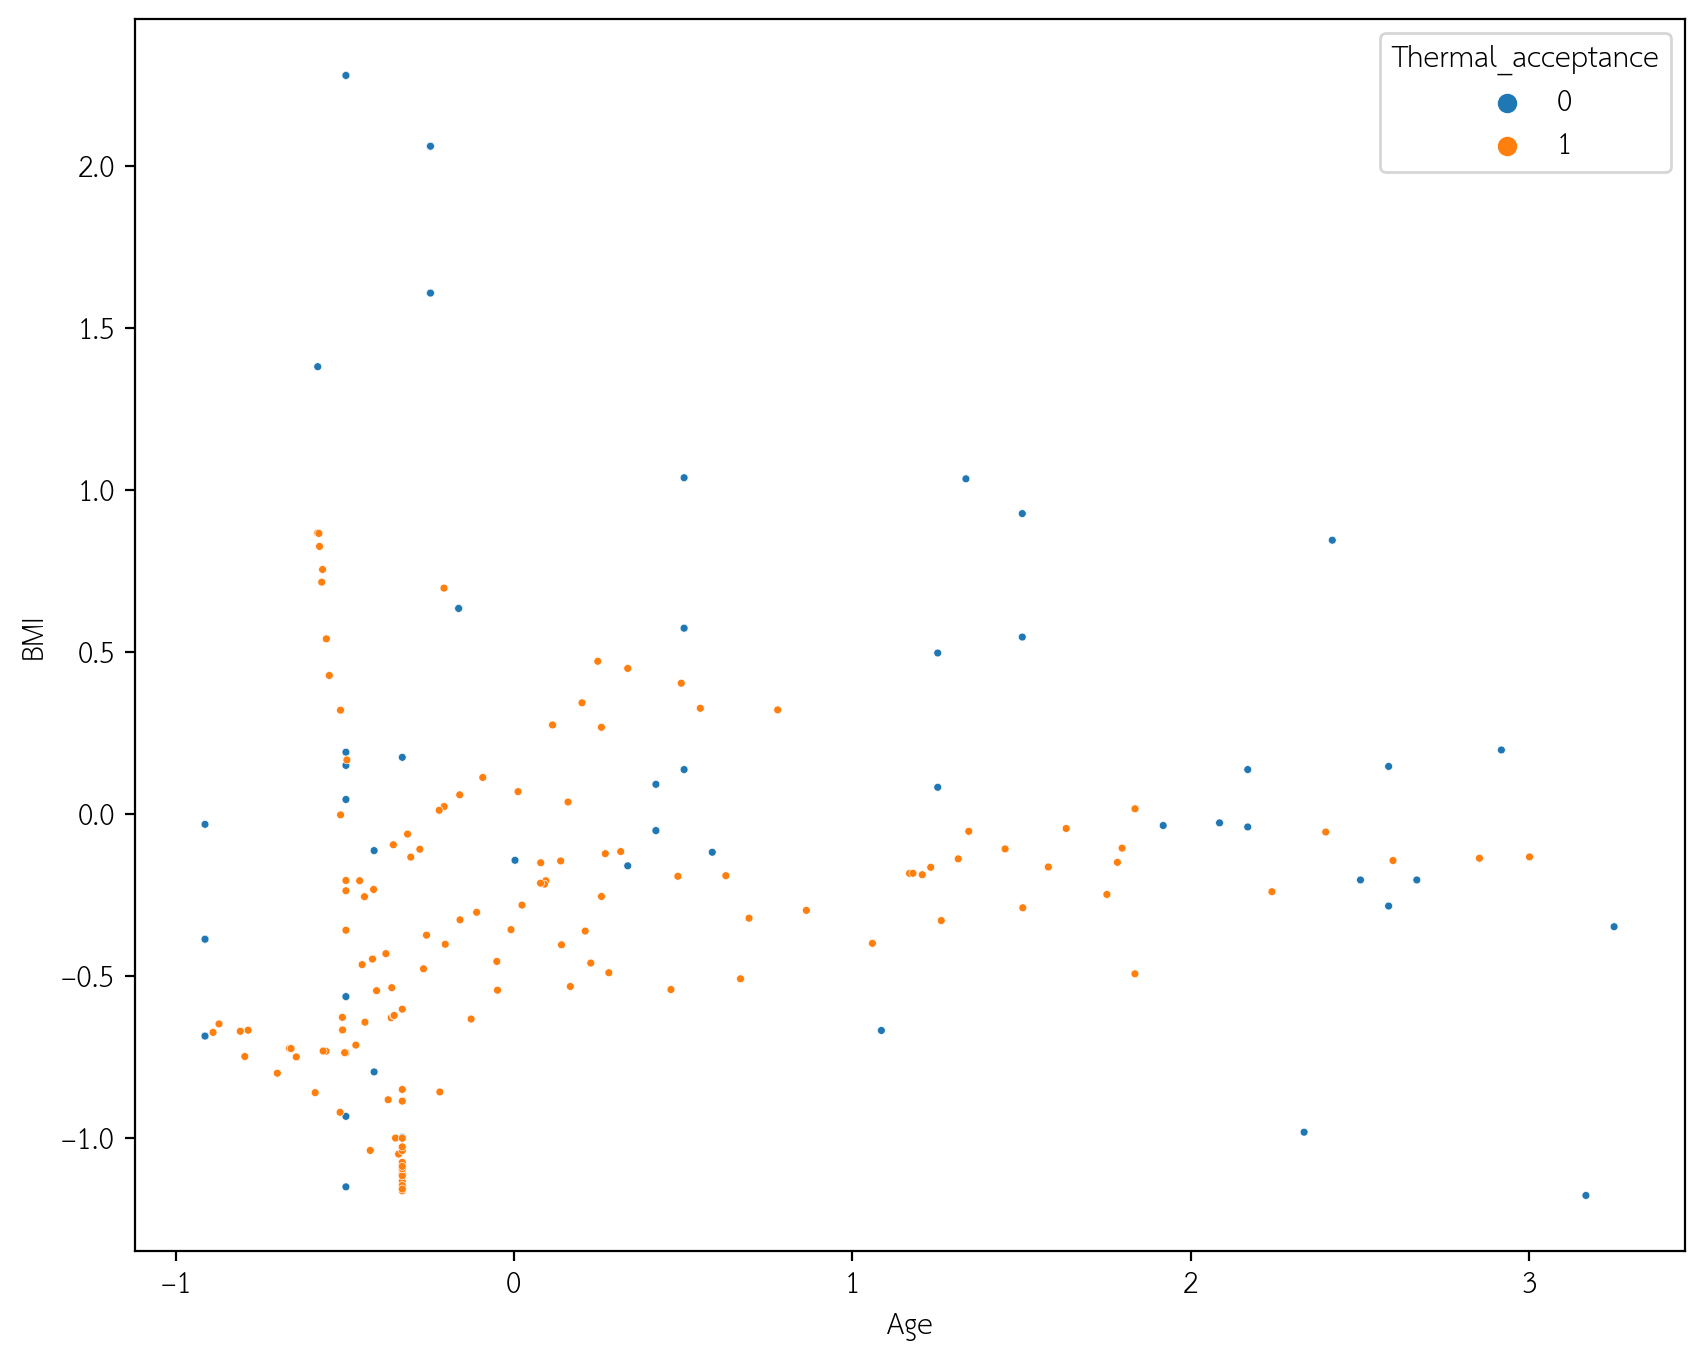

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train_res.iloc[:, 0],
                y=X_train_res.iloc[:, 1],
                hue=y_train_res,
                s=8);
# Constructing a hyperplane using a formula.
w = svm.coef_[0]           # w consists of 2 elements
b = svm.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

In [28]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(10, 8))
# Plotting our two-features-space
#sns.scatterplot(x=X_train_res.iloc[:, 2],
#                y=X_train_res.iloc[:, 3],
#                hue=y_train_res,
#                s=8);
# Constructing a hyperplane using a formula.
#w = svm.coef_[0]           # w consists of 2 elements
#b = svm.intercept_[0]      # b consists of 1 element
#x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
#y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
#plt.plot(x_points, y_points, c='r');